<a href="https://colab.research.google.com/github/JunYear/ML-DL/blob/main/2.%20AI%26ML%20Hands-On/%5BHands_On%5D_CIFAR_10_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


<ipython-input-2-1889553ba429>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


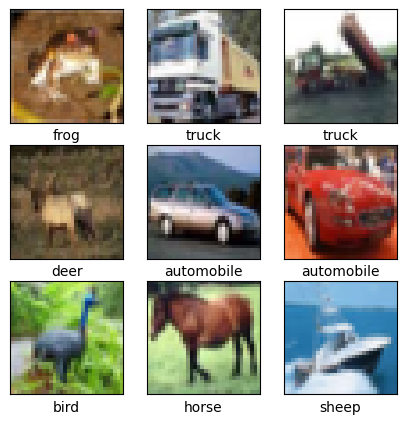

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [ ]:
# CIFAR-10 데이터셋 전처리 과정
## 평균과 표준 편차는 채널별로 구해준다
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [ ]:
# CIFAR-10 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()

# (32, 32, 3)의 데이터를 입력으로 받는다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,122 (3.11 MB)

 Trainable params: 814,122 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# CIFAR-10 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data = (x_val, y_val)
)

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.3221 - loss: 1.8570 - val_acc: 0.5092 - val_loss: 1.3443
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5343 - loss: 1.3034 - val_acc: 0.5637 - val_loss: 1.2265
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.6095 - loss: 1.1054 - val_acc: 0.6265 - val_loss: 1.0517
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.6611 - loss: 0.9639 - val_acc: 0.6501 - val_loss: 0.9910
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.7015 - loss: 0.8490 - val_acc: 0.6801 - val_loss: 0.9222
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.7372 - loss: 0.7645 - val_acc: 0.7041 - val_loss: 0.8513
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.7680 - loss: 0.6769 - val_acc: 0.7116 - val_loss: 0.8209
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.7925 - loss: 0.6013 - val_acc: 0.7203 - val_loss: 0.8149
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━━━

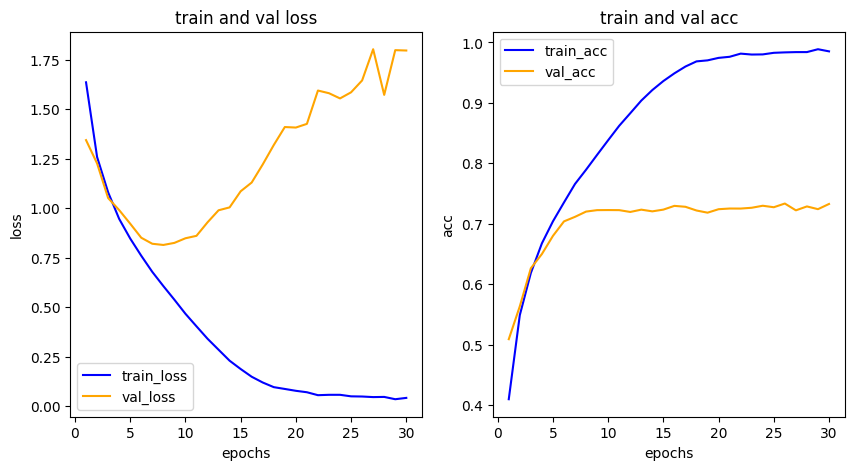

In [ ]:
# CIFAR-10 학습 과정 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

## 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

## 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
norm_layer = tf.keras.layers.Normalization(axis = -1, dtype = 'float32')
norm_layer.adapt(x_train)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 777)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape = (32, 32, 3)),
    norm_layer
])

# 입력 데이터는 (75, 75, 3)의 형태를 가집니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.3279 - loss: 2.3623 - val_acc: 0.5061 - val_loss: 1.7703
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.5240 - loss: 1.7119 - val_acc: 0.5749 - val_loss: 1.5561
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.6041 - loss: 1.4955 - val_acc: 0.6182 - val_loss: 1.4165
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.6583 - loss: 1.3224 - val_acc: 0.6536 - val_loss: 1.3011
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.6900 - loss: 1.2068 - val_acc: 0.6845 - val_loss: 1.2086
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.7237 - loss: 1.1038 - val_acc: 0.6998 - val_loss: 1.1651
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.7496 - loss: 1.0197 - val_acc: 0.7184 - val_loss: 1.0978
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.7803 - loss: 0.9338 - val_acc: 0.7213 - val_loss: 1.0952
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━━━

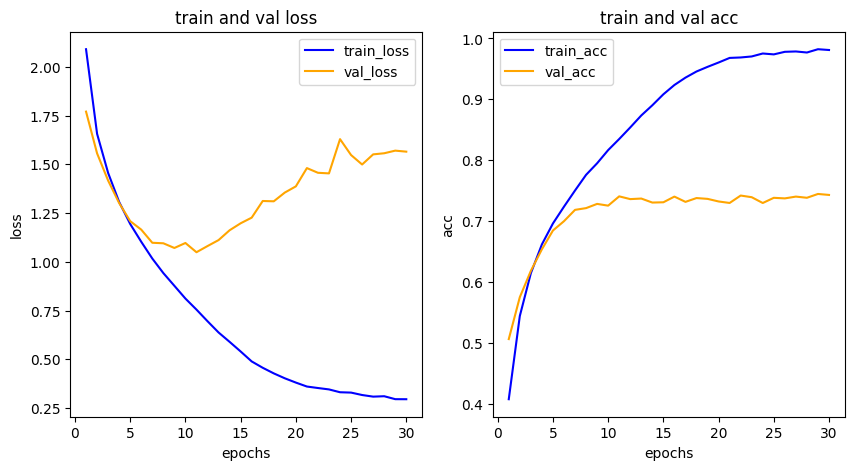

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape = (32, 32, 3)),
    norm_layer
])
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - acc: 0.2790 - loss: 1.9462 - val_acc: 0.4478 - val_loss: 1.5074
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.4823 - loss: 1.4387 - val_acc: 0.5453 - val_loss: 1.2528
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5449 - loss: 1.2681 - val_acc: 0.5880 - val_loss: 1.1343
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5977 - loss: 1.1288 - val_acc: 0.6363 - val_loss: 1.0162
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.6409 - loss: 1.0217 - val_acc: 0.6596 - val_loss: 0.9594
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.6676 - loss: 0.9471 - val_acc: 0.6851 - val_loss: 0.8967
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.6849 - loss: 0.8906 - val_acc: 0.7022 - val_loss: 0.8487
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.7125 - loss: 0.8278 - val_acc: 0.7018 - val_loss: 0.8493
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━━━

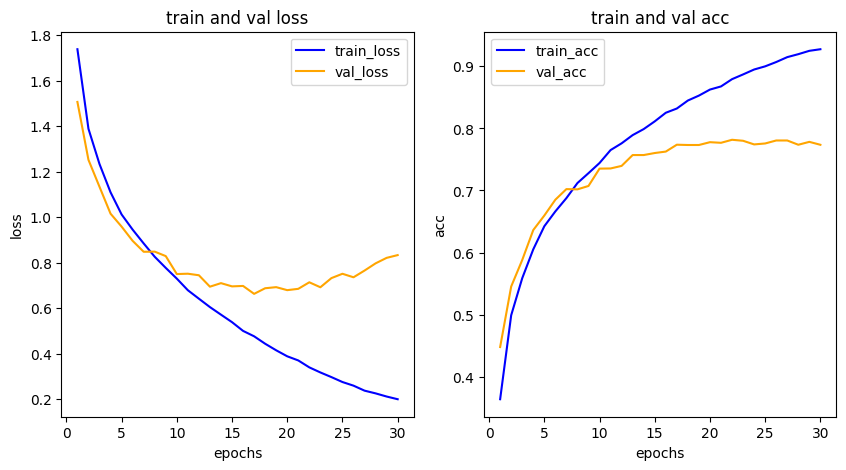

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape = (32, 32, 3)),
    norm_layer
])
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - acc: 0.4081 - loss: 1.6763 - val_acc: 0.5402 - val_loss: 1.2854
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.6371 - loss: 1.0423 - val_acc: 0.6369 - val_loss: 1.0335
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.7275 - loss: 0.8068 - val_acc: 0.6585 - val_loss: 0.9758
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.7865 - loss: 0.6489 - val_acc: 0.6626 - val_loss: 0.9735
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.8450 - loss: 0.5023 - val_acc: 0.6715 - val_loss: 0.9579
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.8868 - loss: 0.3890 - val_acc: 0.6757 - val_loss: 0.9581
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9221 - loss: 0.2899 - val_acc: 0.6794 - val_loss: 1.0027
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9494 - loss: 0.2108 - val_acc: 0.6811 - val_loss: 1.0241
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━━━

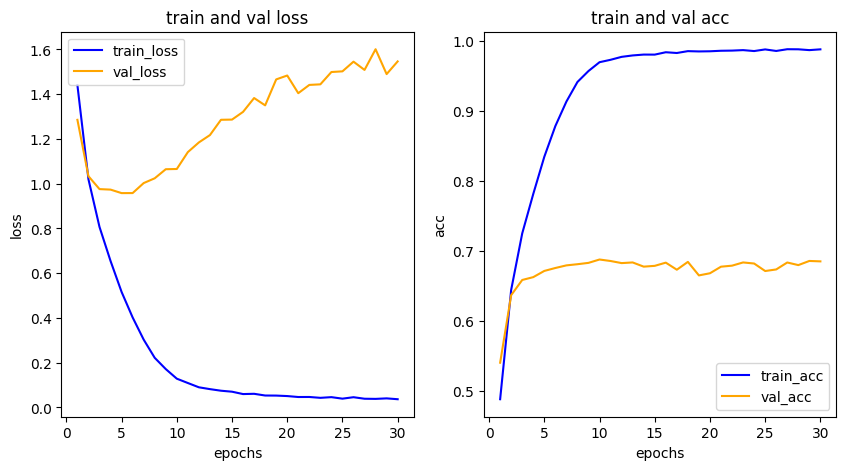

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

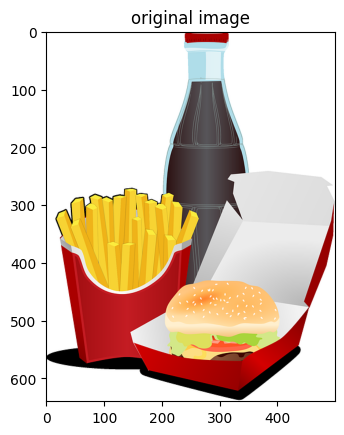

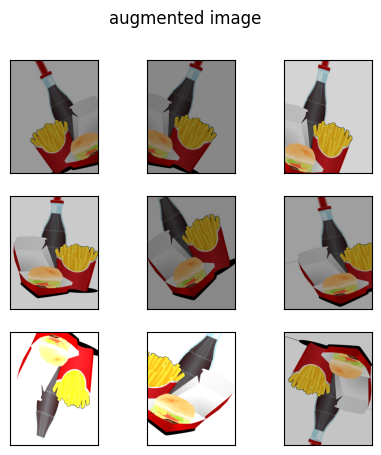

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 이미지 제네레이터를 선언합니다.
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

# 햄버거 사진을 불러옵니다.
hamburger = img_to_array(load_img('/content/hamburger.png')).astype(np.uint8)
plt.figure(); plt.title('original image')
plt.imshow(hamburger)

# 제네레이터를 사용해서 이미지를 변환합니다.
hamburger = hamburger.reshape((1, ) + hamburger.shape)
train_generator = train_datagen.flow(hamburger, batch_size = 1)

fig = plt.figure(figsize = (5, 5))
fig.suptitle('augmented image')

for i in range(9):
    data = next(train_generator) # 제네레이터에게서 이미지를 받아옵니다.
    image = data[0]
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')

plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

norm_layer = tf.keras.layers.Normalization(axis = -1, dtype = 'float32')
norm_layer.adapt(x_train)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 777)

# sparse_categorical_crossentropy를 사용하기 위해선 (batch_size, ) 형태를 가져야합니다.
# 따라서 np.squeeze를 사용해서 마지막 차원을 없애줍니다.
# y_train의 경우 (35000, 1) -> (35000, )이 됩니다.
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=30,
                                   fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train,
                                     batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(x_val, y_val,
                                 batch_size=batch_size,shuffle=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape = (32, 32, 3)),
    #norm_layer
])

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

def get_step(train_len, batch_size):
    return train_len // batch_size


history = model.fit(
    train_generator,
    epochs = 100,
    steps_per_epoch = get_step(len(x_train), batch_size),
    validation_data = val_generator,
    validation_steps = get_step(len(x_val), batch_size)
)

Epoch 1/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - acc: 0.3445 - loss: 1.8304 - val_acc: 0.5045 - val_loss: 1.3716
Epoch 2/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - acc: 0.5000 - loss: 1.5290 - val_acc: 0.6667 - val_loss: 1.2701
Epoch 3/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - acc: 0.4931 - loss: 1.4009 - val_acc: 0.5787 - val_loss: 1.1702
Epoch 4/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - acc: 0.3750 - loss: 1.7885 - val_acc: 0.4583 - val_loss: 1.2097
Epoch 5/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - acc: 0.5497 - loss: 1.2692 - val_acc: 0.6079 - val_loss: 1.1019
Epoch 6/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - acc: 0.4688 - loss: 1.3033 - val_acc: 0.5417 - val_loss: 1.2551
Epoch 7/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - acc: 0.5894 - loss: 1.1547 - val_acc: 0.6372 - val_loss: 1.0103
Epoch 8/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - acc: 0.5312 - loss: 1.1933 - val_acc: 0.5833 - val_loss: 1.3698
Epoch 9/100
1093/10

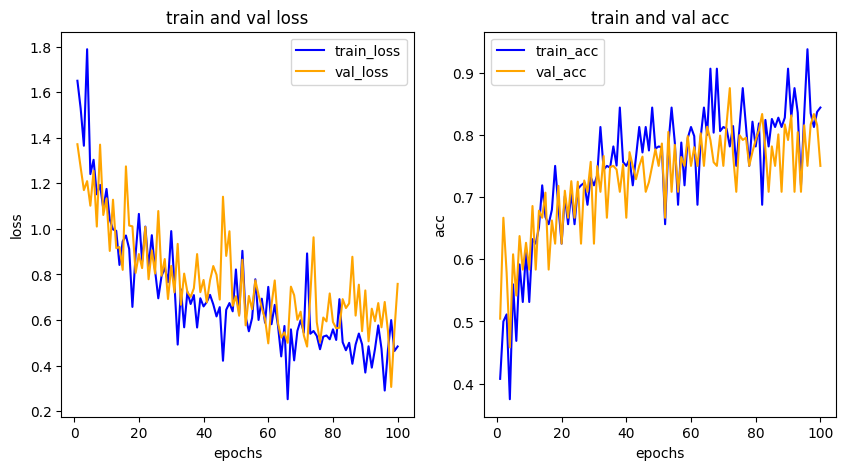

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val4_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
norm_layer = tf.keras.layers.Normalization(axis = -1, dtype = 'float32')
norm_layer.adapt(x_train)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 777)

# sparse_categorical_crossentropy를 사용하기 위해선 (batch_size, ) 형태를 가져야합니다.
# 따라서 np.squeeze를 사용해서 마지막 차원을 없애줍니다.
# y_train의 경우 (35000, 1) -> (35000, )이 됩니다.
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

print('data ready~')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
data ready~


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow(x_train, y_train,
                                    batch_size = batch_size,
                                     shuffle=True)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(x_val, y_val,
                                batch_size = batch_size,
                                 shuffle=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation, Input
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import VGG16

# imagenet을 학습한 모델을 불러옵니다.
vgg16 = VGG16(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)
vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 끝의 4개의 층만 동결을 해제합니다.
for layer in vgg16.layers[:-4]:
    layer.trainable = False

In [ ]:
model = Sequential([
    Input(shape = (32, 32, 3)),
    norm_layer
])
# vgg16 모델을 사용합니다.
model.add(vgg16)
# 분류기를 직접 정의합니다.
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary() # 모델의 구조를 확인하세요!

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 32, 32, 3)           │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,617 (56.65 MB)

 Trainable params: 7,213,834 (27.52 MB)

 Non-trainable params: 7,635,783 (29.13 MB)

In [ ]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 100,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

Epoch 1/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - acc: 0.6999 - loss: 0.8670 - val_acc: 0.7494 - val_loss: 0.7216
Epoch 2/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - acc: 0.6875 - loss: 0.7861 - val_acc: 0.7917 - val_loss: 0.8206
Epoch 3/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - acc: 0.7176 - loss: 0.8136 - val_acc: 0.7493 - val_loss: 0.7296
Epoch 4/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - acc: 0.7812 - loss: 0.7540 - val_acc: 0.8333 - val_loss: 0.5006
Epoch 5/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - acc: 0.7374 - loss: 0.7561 - val_acc: 0.7354 - val_loss: 0.7801
Epoch 6/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - acc: 0.6562 - loss: 0.8677 - val_acc: 0.6667 - val_loss: 0.9768
Epoch 7/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - acc: 0.7445 - loss: 0.7332 - val_acc: 0.7656 - val_loss: 0.6772
Epoch 8/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - acc: 0.7812 - loss: 0.6965 - val_acc: 0.7500 - val_loss: 0.6897
Epoch 9/100
1093/10

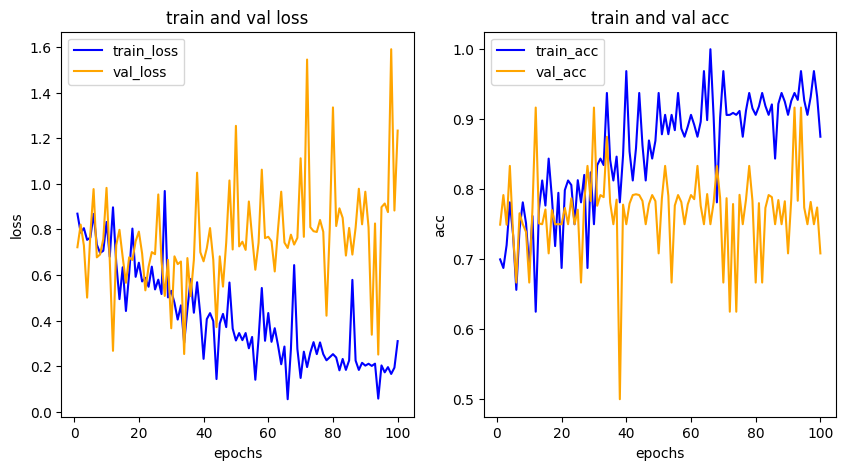

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
for i in range(len(model.layers) - 1):
    model.layers[i].set_weights(model.layers[i].get_weights())